In [1]:
import numpy as np
d = 64                           # dimension
nb = 100000                      # database size
nq = 10000                       # nb of queries
np.random.seed(1234)             # make reproducible
xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 1000.
xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.

In [5]:
xb.shape

(100000, 64)

In [8]:
xb[0]

array([0.19151945, 0.62210876, 0.43772775, 0.7853586 , 0.77997583,
       0.2725926 , 0.27646425, 0.8018722 , 0.95813936, 0.87593263,
       0.35781726, 0.5009951 , 0.6834629 , 0.71270204, 0.37025076,
       0.5611962 , 0.50308317, 0.01376845, 0.7728266 , 0.8826412 ,
       0.364886  , 0.6153962 , 0.07538124, 0.368824  , 0.9331401 ,
       0.65137815, 0.39720258, 0.78873014, 0.31683612, 0.56809866,
       0.8691274 , 0.4361734 , 0.8021476 , 0.14376682, 0.70426095,
       0.7045813 , 0.21879211, 0.92486763, 0.44214076, 0.90931594,
       0.05980922, 0.18428709, 0.04735528, 0.6748809 , 0.59462476,
       0.5333102 , 0.04332406, 0.5614331 , 0.32966843, 0.5029668 ,
       0.11189432, 0.6071937 , 0.5659447 , 0.00676406, 0.6174417 ,
       0.9121229 , 0.7905241 , 0.99208146, 0.95880175, 0.7919641 ,
       0.28525096, 0.62491673, 0.4780938 , 0.19567518], dtype=float32)

In [7]:
xq.shape

(10000, 64)

In [1]:
thetas=[0.,0.2,0.4,0.6,0.8,1.0]
k_infos=[[464, 95, 120, 432, 637, 167, 357, 215, 560, 151, 455, 119, 453, 540, 238, 89, 542, 222, 479, 433, 649, 550, 80, 105, 192, 402, 168, 461, 196, 146, 329, 532, 665, 159, 362, 31, 127, 48, 1, 284, 686, 197, 534, 34, 49, 199, 648, 366, 417, 641], [464, 95, 432, 120, 119, 560, 455, 215, 637, 192, 89, 196, 542, 362, 540, 550, 479, 238, 34, 453, 371, 48, 402, 105, 151, 357, 80, 665, 649, 159, 146, 222, 232, 329, 433, 197, 199, 167, 168, 545, 534, 417, 49, 641, 102, 532, 403, 509, 64, 46], [464, 432, 119, 95, 362, 196, 192, 560, 455, 34, 371, 215, 89, 542, 120, 550, 540, 232, 479, 509, 48, 490, 637, 45, 665, 402, 242, 199, 619, 668, 403, 238, 159, 197, 105, 106, 545, 453, 255, 155, 146, 257, 64, 274, 87, 641, 417, 80, 329, 46], [362, 119, 371, 196, 34, 432, 192, 490, 509, 464, 560, 106, 45, 95, 232, 455, 242, 619, 89, 215, 257, 668, 542, 48, 550, 403, 185, 140, 87, 540, 19, 169, 479, 155, 255, 328, 665, 199, 402, 197, 274, 545, 487, 160, 159, 634, 46, 417, 120, 157], [62, 362, 106, 490, 371, 34, 509, 196, 45, 119, 242, 192, 257, 619, 232, 432, 185, 140, 668, 169, 19, 87, 560, 328, 403, 455, 48, 157, 487, 17, 89, 155, 255, 542, 95, 215, 297, 274, 550, 320, 430, 464, 199, 665, 545, 634, 197, 540, 479, 42], [106, 490, 362, 371, 509, 242, 45, 34, 257, 185, 619, 17, 196, 140, 169, 19, 232, 192, 119, 668, 328, 87, 157, 297, 487, 403, 432, 320, 155, 430, 560, 48, 255, 312, 274, 42, 455, 271, 29, 126, 286, 89, 0, 634, 447, 316, 199, 542, 197, 605]]
dataset='assistment'
cdm='irt'
stg='MFI'
import json
ball_trait = json.load(open(f'/data/yutingh/CAT/data/{dataset}/{stg}/ball_trait.json', 'r'))

In [ ]:
a = set(k_infos[0])
b = set(k_infos[-1])
selected = a.union(b)
unselected = set(range(len(ball_trait)))-selected
target=[0]*len(ball_trait)
for a in selected:
    target[a]=0
for b in unselected:
    target[b]=1
# print(unselected)
# a_diff = a-b
# b_diff  =b-a
# target=[0]*len(ball_trait)
# for a in a_diff:
#     target[a]=1
# for b in b_diff:
#     target[b]=2

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 加载PCA算法包
import numpy as np
  
y = target
x = ball_trait

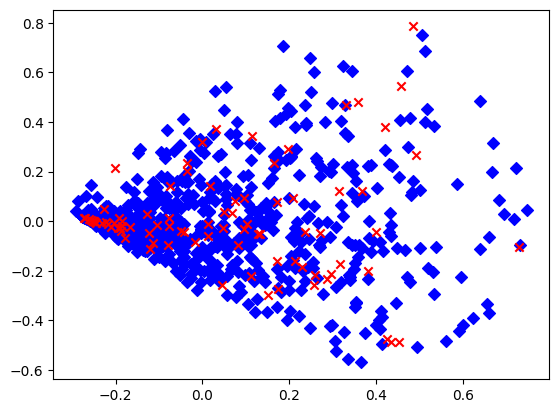

In [41]:

pca = PCA(n_components=2)  # 加载PCA算法，设置降维后主成分数目为2
reduced_x = pca.fit_transform(x)  # 对样本进行降维
# reduced_x = np.dot(reduced_x, pca.components_) + pca.mean_  # 还原数据
  
red_x, red_y = [], []
blue_x, blue_y = [], []
# green_x, green_y = [], []
# print(reduced_x)
for i in range(len(reduced_x)):
    if y[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    # else:
    #     green_x.append(reduced_x[i][0])
    #     green_y.append(reduced_x[i][1])
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(red_x, red_y, c='r', marker='x')
# plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()